Metody zpracování signálu v časové oblasti
- **kovariance**
- korelace

Kovariance
- statistická míra  lineární závislosti dvou veličin/datasetů
- normovaná hodnota kovariance je korelační koeficient/matice

Pro jednotlivé realizace náhodných veličin $X$ a $Y$ platí, že 

$${\rm cov}(X,Y) = E[ (X-E[X])(Y-E[Y])]$$

  - $E[X]$ je očekávaná hodnota veličiny $X$, tedy střední hodnota
  - Vzorec lze přepsat na tvar 

$${\rm cov}(X,Y) = E[X,Y] - E[X]E[Y]$$
- u této rovnice je nutné dávat pozor na numerickou stabilitu (zaokrouhlovací chyba)


Pokud je $X,Y$ vektor diskrétních hodnot $X=\{ x_1,x_2,\dots, x_n \},Y=\{ y_1,y_2,\dots, y_n \}$ lze kovarianci napsat jako 

$${\rm cov}(X,Y) = \frac{1}{n} \sum_{i=1}^{n} \left(x_i-E(X)\right) \left(y_i-E(Y)\right)$$

- v případě auto-kovariance: ${\rm cov}(X,X) = {\rm var}(X)= \sigma^2(X)$ je výsledkem směrodatná odchylka

**Zobecnění výpočtu na $m$ rozměrné reálné vektory**

$\mathbf{X} = \left[ X_1,X_2,\dots X_m \right]$ a $\mathbf{Y} = \left[ Y_1,Y_2,\dots Y_m \right]$

je výstupem auto-kovariance  matice koeficientů $K_{XX}$

$$K_{XX} = {\rm cov} (\mathbf{X},\mathbf{X}) = E[\mathbf{X}\mathbf{X}^T] - E[\mathbf{X}]E[\mathbf{X}]^T$$

a výstupem cross-kovariance matice koeficientů $K_{XY}$

$$K_{XY} = {\rm cov} (\mathbf{X},\mathbf{Y}) = E[\mathbf{X}\mathbf{Y}^T] - E[\mathbf{X}]E[\mathbf{Y}]^T$$

Použití kovariance v praxi
 - předpovědní modely počasí (monitoring odhadu chyby komplikovaných modelů v závislosti na jejich korelaci apod.)
 - pro popis variability spektra signálu
 - Kalmanův filtr - nástroj umožňující odhadnout např. stav stochastického lineárního dynamického systému. Pro odhad se využívají data zatížená šumem
 - zpracování obrazu
 - investování
 - kyberbezpečnost

Nagenerujte dvě lineární funkce $y=a*x+b$ a spočítejte kovarianci těchto dvou datových řad
- měntě koeficienty funkcí a pozorujte jejich vliv na kovarianční matici
- Místo lineárních funkcí zkuste dosadit funkce s komplikovanější závislostí

In [2]:
import numpy as np
import scipy as sp
from scipy import signal
from matplotlib import pyplot as plt


[[0.06790635 0.00679064]
 [0.00679064 0.00067906]]


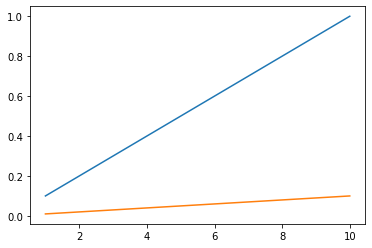

In [15]:
N=500;

def Fun(a,b,x):
    F= a*x+b;
    return np.array(F)

def Fun2(a,b,x):
    F= x**a+b;
    return np.array(F)

x = np.linspace(1,10,N);
F1 = Fun(0.1,0,x);
F2 = Fun(0.01,0,x);

C=np.cov(F1,F2);
plt.plot(x,F1,x,F2);

print(C)

Proveďte výpočet kovariance pro 
- pilový
- sinový
- obdélníkový
- náhodný

signál a vizualizujte porovnání kovariačních koeficientů. 
 
 - U pilového signálu měňte pozici maxima v rámci jedné periody a pozorujte vliv na kovarianční matici


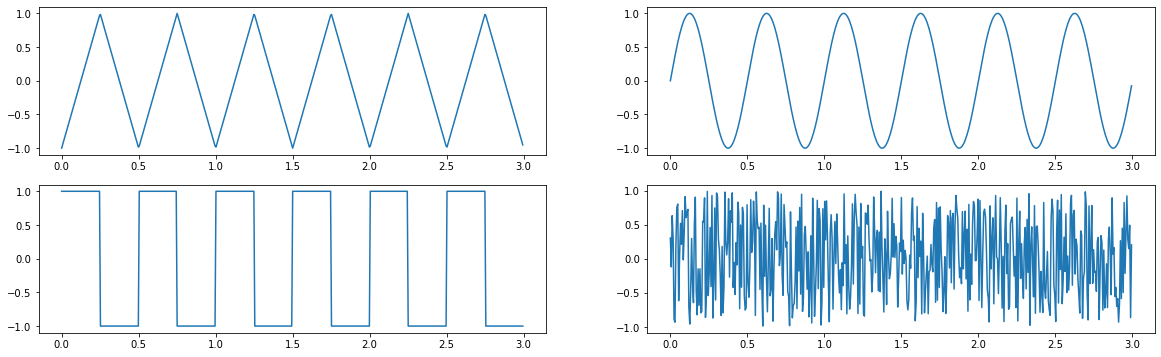

,0,1,2,3
0,3.340441e-01,2.781120e-16,-0.008016,-0.013614
1,2.781120e-16,5.010020e-01,0.637862,0.003807
2,-8.016032e-03,6.378620e-01,1.002004,0.017225
3,-1.361355e-02,3.806981e-03,0.017225,0.323134


In [16]:
n_length = 500;
Amp=1.0;

numT=6;
f = 2;
A0=1.0;
T=1/f;
Tmax = numT*T;

tvec = np.linspace(0,Tmax,n_length, endpoint=False);
Err = Amp*np.random.rand(n_length)

Xvals = np.zeros((4,n_length))

Xvals[0,:] = sp.signal.sawtooth(2*np.pi*f*tvec,0.5)
Xvals[1,:] = np.sin(2*np.pi*f*tvec)
Xvals[2,:] = sp.signal.square(2*np.pi*f*tvec)
Xvals[3,:] = 2*Err-1

if(1):
    plt.rcParams["figure.figsize"] = (20,6)
    plt.subplot(2,2,1)
    plt.plot(tvec,Xvals[0,:])
    plt.subplot(2,2,2)
    plt.plot(tvec,Xvals[1,:])
    plt.subplot(2,2,3)
    plt.plot(tvec,Xvals[2,:])
    plt.subplot(2,2,4)
    plt.plot(tvec,Xvals[3,:])
    plt.show()

C=np.cov(Xvals)
#print(C.shape)

# visualize the matrix using Pandas dataframe
import pandas
from pandas import *
DataFrame(C)


<hr style="border:2px solid gray">

Metody zpracování signálu v časové oblasti
- kovariance
    -  statistická míra  lineární závislosti (dvou) veličin/datasetů, časových řad apod.
    -  udává informace o celém procesu najednou 

- **korelace**
    -   matematicky odpovídá procesu konvoluce 

    $$x[t]*h[t] = \int_{-\infty}^{\infty} x[\tau]\cdot h[t - \tau] {\rm d} \tau$$

    $$x[k]*h[k] = \sum_{i=-\infty}^{+\infty} x[i]\cdot h[k-i]$$

    - funkce $h$ nepředstavuje kovoluční jádro, ale
        - stejnou funkci $x[t]$ - Autokorelace
        - jinou funkci/časovou řadu - cross korelace
    - záleží na pořadí funkcí v korelačním vzorci 
     
     $$x[t]*h[t] = \int_{-\infty}^{\infty} x[\tau]\cdot h[t - \tau] {\rm d} \tau$$
     $$h[t]*x[t] = \int_{-\infty}^{\infty} h[\tau]\cdot x[t - \tau] {\rm d} \tau$$

     - Výstupem procesu je 
        - korelační koeficient: lze získat znotmováním procesu kovariance
        - korealční funkce: monitoruje dosah korelace v rámci časové řady (korelační čas $t_{\tau}$)



Výpočet auto-korelační funkce diskrétního signálu
    $$x[k]*x[k] = \sum_{i=-\infty}^{+\infty} x[i]\cdot x[k-i]$$
- parameter $i$ představuje tzv zpoždění (lag)


0.053000450134277344
0.0


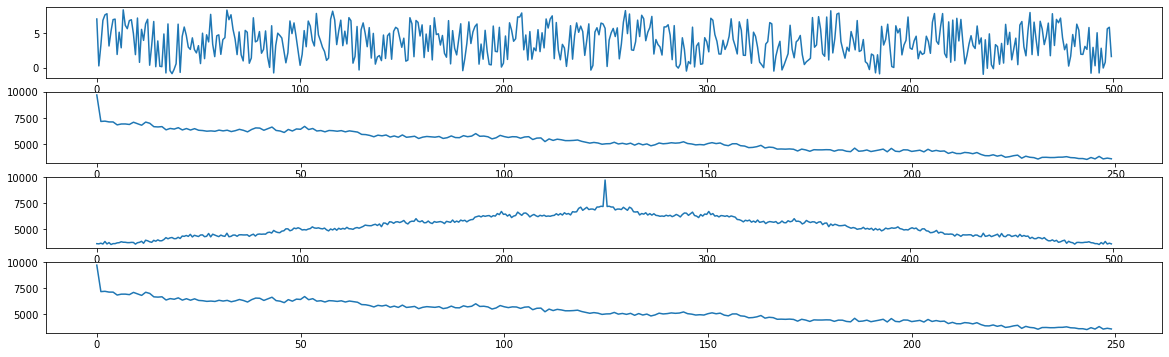

In [23]:
import time
from scipy import signal

n_length = 500;
Amp=7.5;

numT=10;
f = 2;
A0=1.0;
T=1/f;
Tmax = numT*T;

tvec = np.linspace(0,Tmax,n_length, endpoint=False);

Err = Amp*np.random.rand(n_length)
base=np.sin(2*np.pi*f*tvec)
#x_t = base + Err
x_t = Err
MaxACF=int(np.floor(tvec.size/2))

# calculate ACF manually and measure time
ACF=np.zeros(MaxACF)

start = time.time()

for lag in range(0,MaxACF): #iterate over all lags
    tmp_sum=0.0
    for i in range(0,n_length-lag):
        tmp_sum += x_t[i]*x_t[i+lag]         
    ACF[lag] = tmp_sum


end = time.time()
print(end - start)

start = time.time()
#compare with built-in numpy/scipy function
ACFnmp=np.correlate(x_t,x_t,mode='same')
#ACFnmp /= np.max(ACFnmp)
# split Correlation fucntion into relevant parts
ACFnmp2=np.array_split(ACFnmp,2)
ACFnmpFin=np.array(ACFnmp2[1])
end = time.time()

print(end - start)

plt.subplot(411)
plt.plot(x_t);
plt.subplot(412)
plt.plot(ACF);
plt.subplot(413)
plt.plot(ACFnmp);
plt.subplot(414)
plt.plot(ACFnmpFin);

škálování a normalizace korelační funkce 
- škálujeme na interval $\langle 0,1 \rangle$
- nromujeme hodnoty dle množství dat, pro každý interval  máme  

-4.6407322429331543e-14


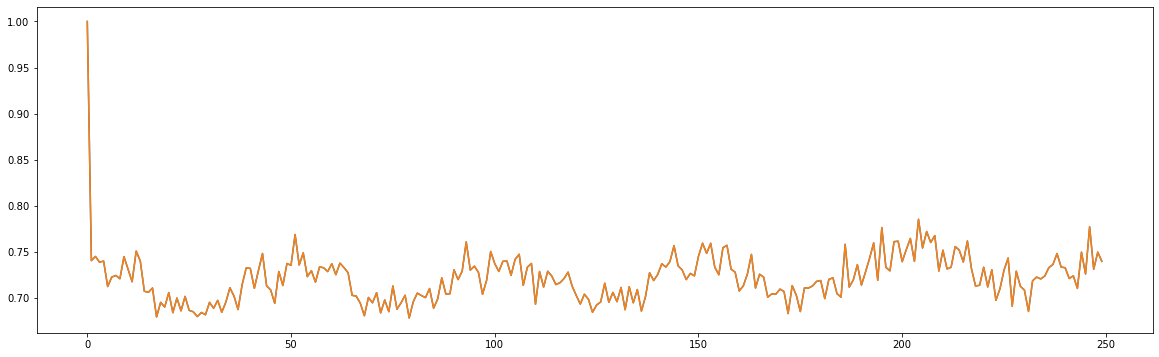

In [24]:
#scaling and detrending the ACF to measure the fall to baselline

nlag = np.max(ACF.size)
lags=np.arange(n_length,nlag,-1)

ACFLaged=ACF/lags
ACFnmpFinLagged=ACFnmpFin/lags
ACFscaled = ACFLaged/ACFLaged[0]
ACFFinscaled = ACFnmpFinLagged/ACFnmpFinLagged[0]

print(np.sum(ACFscaled-ACFFinscaled))
plt.plot(ACFscaled);
plt.plot(ACFFinscaled);


Proveďte výpočet autokorelační a cross korelační funkce pro všechny výše uvažované periodické funkce 
- sinová vlna
- obdélníkový signál
- pilový signál
- náhodný signál

Výstupy porovnejte s kovarianční maticí.